In [4]:
# Returns the Peak Signal-to-Noise Ratio between image a and image b.

In [1]:
import tensorflow as tf
import glob

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#categories = glob.glob('PSNR/*')

categories = ['baseball', 'room']
attack_types = ['pgd', 'fgsm']
architectures = ['mobilenet', 'resnet', 'efficientnet']

category = categories[1]
attack = attack_types[0]
architecture = architectures[0]


adversarial_images = glob.glob('PSNR/{}/{}/{}/*.jpg'.format(category, architecture, attack))
original_image = glob.glob('PSNR/{}/original/*.jpg'.format(category))

print(categories)
print()
print(adversarial_images)
print()
print(original_image)

['baseball', 'room']

['PSNR/room/mobilenet/pgd\\000000000139.jpg', 'PSNR/room/mobilenet/pgd\\eps0.01.jpg', 'PSNR/room/mobilenet/pgd\\eps0.02.jpg', 'PSNR/room/mobilenet/pgd\\eps0.03.jpg', 'PSNR/room/mobilenet/pgd\\eps0.04.jpg', 'PSNR/room/mobilenet/pgd\\eps0.05.jpg', 'PSNR/room/mobilenet/pgd\\eps0.06.jpg', 'PSNR/room/mobilenet/pgd\\eps0.07.jpg', 'PSNR/room/mobilenet/pgd\\eps0.08.jpg', 'PSNR/room/mobilenet/pgd\\eps0.09.jpg', 'PSNR/room/mobilenet/pgd\\eps0.1.jpg', 'PSNR/room/mobilenet/pgd\\eps0.11.jpg', 'PSNR/room/mobilenet/pgd\\eps0.12.jpg', 'PSNR/room/mobilenet/pgd\\eps0.13.jpg', 'PSNR/room/mobilenet/pgd\\eps0.14.jpg', 'PSNR/room/mobilenet/pgd\\eps0.15.jpg']

['PSNR/room/original\\000000000139.jpg']


25.98269


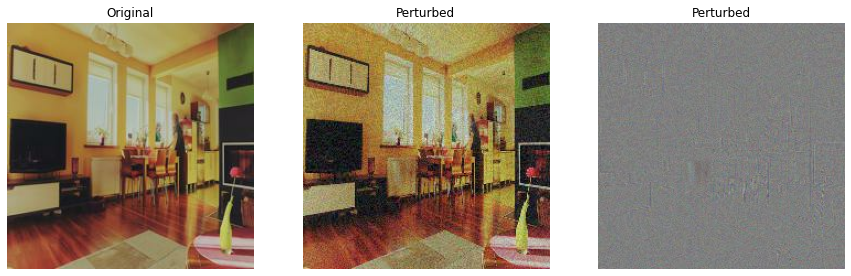

31.047663


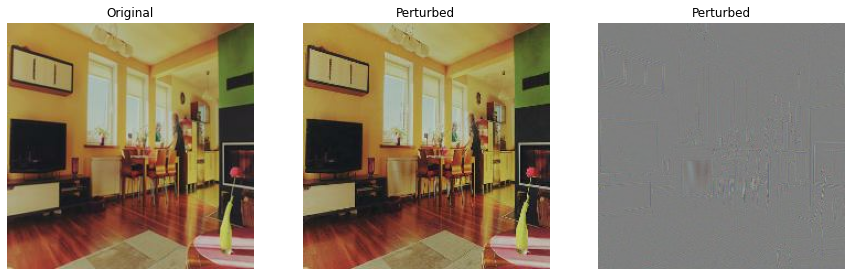

In [ ]:
def plot_images(im1,im2):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1, 3, 1)
    imgplot = plt.imshow(im1)
    ax.set_title('Original')
    plt.axis('off')
    
    ax = fig.add_subplot(1, 3, 2)
    imgplot = plt.imshow(im2)
    ax.set_title('Perturbed')
    plt.axis('off')
    
    ax = fig.add_subplot(1, 3, 3)
    imgplot = plt.imshow((im2-im1)* 0.5 + 0.5)
    ax.set_title('Perturbed')
    plt.axis('off')
    plt.show()
    

# Read images from file.
psnr_values = []
for ae in adversarial_images:
    im1 = tf.io.read_file(original_image[0])
    im2 = tf.io.read_file(ae)
    # Compute PSNR over tf.uint8 Tensors.
    im1 = tf.image.decode_jpeg(im1, channels=3)
    im2 = tf.image.decode_jpeg(im2, channels=3)
    psnr1 = tf.image.psnr(im1, im2, max_val=255)
    
    # Compute PSNR over tf.float32 Tensors.
    im1 = tf.image.convert_image_dtype(im1, tf.float32)
    im2 = tf.image.convert_image_dtype(im2, tf.float32)
    psnr2 = tf.image.psnr(im1, im2, max_val=1.0)
    
    print(psnr2.numpy())
    psnr_values.append(psnr2.numpy())
    plot_images(im1, im2)

In [20]:
for value in psnr_values:
    print(round(value.astype(float),2))

29.99
29.1
28.0
26.83
25.69
24.61
23.62
22.71
21.86
21.06


In [21]:
print(adversarial_images)

['PSNR/baseball/efficientnet/fgsm\\eps0.01.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.02.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.03.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.04.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.05.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.06.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.07.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.08.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.09.jpg', 'PSNR/baseball/efficientnet/fgsm\\eps0.1.jpg']


IndexError: list index out of range

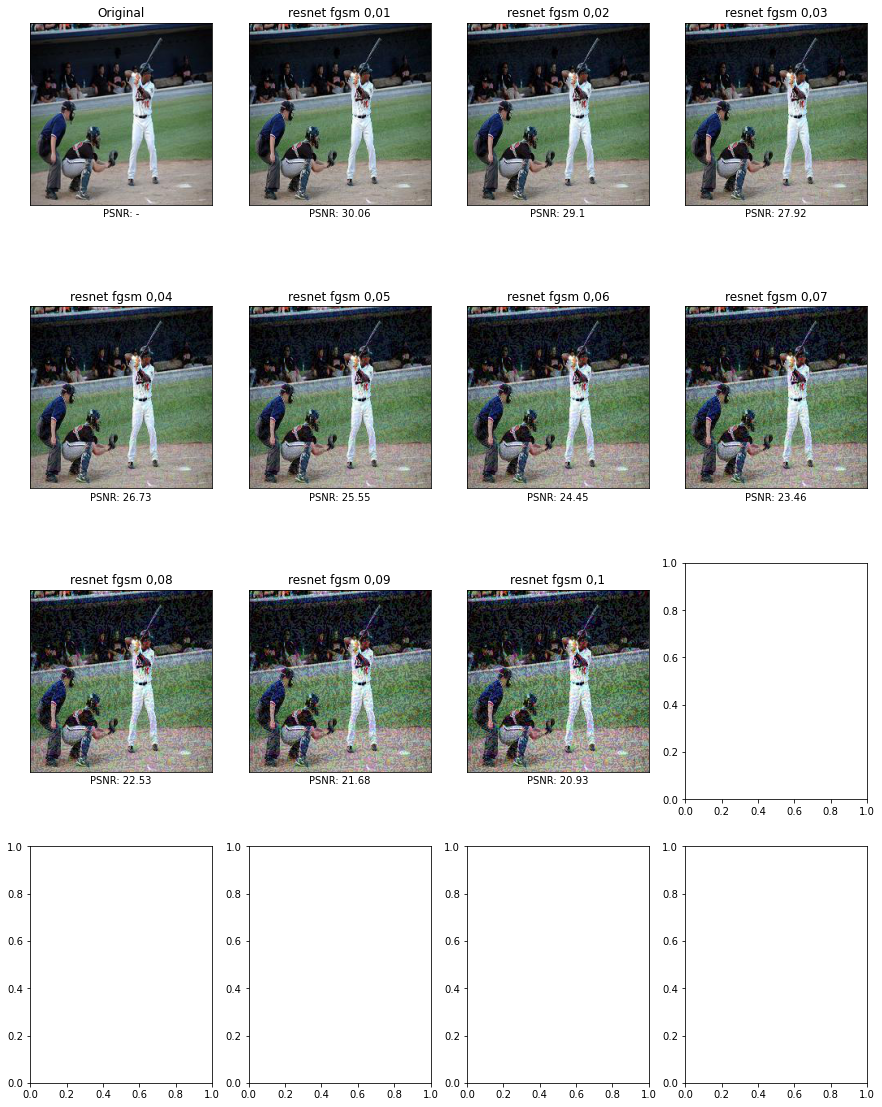

In [16]:
# FOR PGD VISUALIZATION


def collage_images():
    fig, ax = plt.subplots(4, 4, figsize=(15,20))
    ax[0,0].imshow(mpimg.imread(original_image[0]))
    ax[0,0].set_title('Original')
    ax[0,0].set_xlabel('PSNR: -')
    ax[0,0].set_xticks([])
    ax[0,0].set_yticks([])
    
    ax[0,1].imshow(mpimg.imread(adversarial_images[0]))
    ax[0,1].set_title(architecture + ' ' + attack + ' 0,01')
    ax[0,1].set_xlabel('PSNR: ' + str(round(psnr_values[0].astype(float),2)))
    ax[0,1].set_xticks([])
    ax[0,1].set_yticks([])
    
    ax[0,2].imshow(mpimg.imread(adversarial_images[1]))
    ax[0,2].set_title(architecture + ' ' + attack + ' 0,02')
    ax[0,2].set_xlabel('PSNR: ' + str(round(psnr_values[1].astype(float),2)))
    ax[0,2].set_xticks([])
    ax[0,2].set_yticks([])
    
    ax[0,3].imshow(mpimg.imread(adversarial_images[2]))
    ax[0,3].set_title(architecture + ' ' + attack + ' 0,03')
    ax[0,3].set_xlabel('PSNR: ' + str(round(psnr_values[2].astype(float),2)))
    ax[0,3].set_xticks([])
    ax[0,3].set_yticks([])
    
    ax[1,0].imshow(mpimg.imread(adversarial_images[3]))
    ax[1,0].set_title(architecture + ' ' + attack + ' 0,04')
    ax[1,0].set_xlabel('PSNR: ' + str(round(psnr_values[3].astype(float),2)))
    ax[1,0].set_xticks([])
    ax[1,0].set_yticks([])
    
    ax[1,1].imshow(mpimg.imread(adversarial_images[4]))
    ax[1,1].set_title(architecture + ' ' + attack + ' 0,05')
    ax[1,1].set_xlabel('PSNR: ' + str(round(psnr_values[4].astype(float),2)))
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])
    
    ax[1,2].imshow(mpimg.imread(adversarial_images[5]))
    ax[1,2].set_title(architecture + ' ' + attack + ' 0,06')
    ax[1,2].set_xlabel('PSNR: ' + str(round(psnr_values[5].astype(float),2)))
    ax[1,2].set_xticks([])
    ax[1,2].set_yticks([])
    
    ax[1,3].imshow(mpimg.imread(adversarial_images[6]))
    ax[1,3].set_title(architecture + ' ' + attack + ' 0,07')
    ax[1,3].set_xlabel('PSNR: ' + str(round(psnr_values[6].astype(float),2)))
    ax[1,3].set_xticks([])
    ax[1,3].set_yticks([])
    
    ax[2,0].imshow(mpimg.imread(adversarial_images[7]))
    ax[2,0].set_title(architecture + ' ' + attack + ' 0,08')
    ax[2,0].set_xlabel('PSNR: ' + str(round(psnr_values[7].astype(float),2)))
    ax[2,0].set_xticks([])
    ax[2,0].set_yticks([])
    
    ax[2,1].imshow(mpimg.imread(adversarial_images[8]))
    ax[2,1].set_title(architecture + ' ' + attack + ' 0,09')
    ax[2,1].set_xlabel('PSNR: ' + str(round(psnr_values[8].astype(float),2)))
    ax[2,1].set_xticks([])
    ax[2,1].set_yticks([])
    
    ax[2,2].imshow(mpimg.imread(adversarial_images[9]))
    ax[2,2].set_title(architecture + ' ' + attack + ' 0,1')
    ax[2,2].set_xlabel('PSNR: ' + str(round(psnr_values[9].astype(float),2)))
    ax[2,2].set_xticks([])
    ax[2,2].set_yticks([])
    
    ax[2,3].imshow(mpimg.imread(adversarial_images[10]))
    ax[2,3].set_title(architecture + ' ' + attack + ' 0,11')
    ax[2,3].set_xlabel('PSNR: ' + str(round(psnr_values[10].astype(float),2)))
    ax[2,3].set_xticks([])
    ax[2,3].set_yticks([])
    
    ax[3,0].imshow(mpimg.imread(adversarial_images[11]))
    ax[3,0].set_title(architecture + ' ' + attack + ' 0,12')
    ax[3,0].set_xlabel('PSNR: ' + str(round(psnr_values[11].astype(float),2)))
    ax[3,0].set_xticks([])
    ax[3,0].set_yticks([])
    
    ax[3,1].imshow(mpimg.imread(adversarial_images[12]))
    ax[3,1].set_title(architecture + ' ' + attack + ' 0,13')
    ax[3,1].set_xlabel('PSNR: ' + str(round(psnr_values[12].astype(float),2)))
    ax[3,1].set_xticks([])
    ax[3,1].set_yticks([])
    
    ax[3,2].imshow(mpimg.imread(adversarial_images[13]))
    ax[3,2].set_title(architecture + ' ' + attack + ' 0,14')
    ax[3,2].set_xlabel('PSNR: ' + str(round(psnr_values[13].astype(float),2)))
    ax[3,2].set_xticks([])
    ax[3,2].set_yticks([])
    
    ax[3,3].imshow(mpimg.imread(adversarial_images[14]))
    ax[3,3].set_title(architecture + ' ' + attack + ' 0,15')
    ax[3,3].set_xlabel('PSNR: ' + str(round(psnr_values[14].astype(float),2)))
    ax[3,3].set_xticks([])
    ax[3,3].set_yticks([])
    
    plt.subplots_adjust(wspace=0.01, hspace=0)

#orig = mpimg.imread(original_image[0])
collage_images()

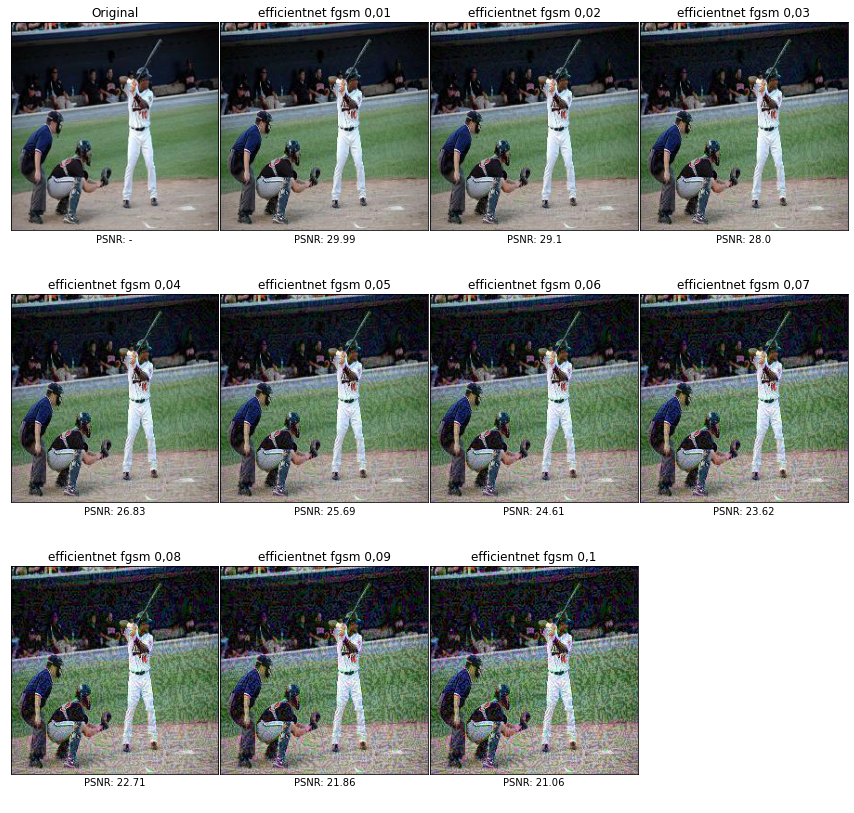

In [22]:
# FOR FGSM VISUALIZATION

def collage_images():
    fig, ax = plt.subplots(3, 4, figsize=(15,15))
    ax[0,0].imshow(mpimg.imread(original_image[0]))
    ax[0,0].set_title('Original')
    ax[0,0].set_xlabel('PSNR: -')
    ax[0,0].set_xticks([])
    ax[0,0].set_yticks([])
    
    ax[0,1].imshow(mpimg.imread(adversarial_images[0]))
    ax[0,1].set_title(architecture + ' ' + attack + ' 0,01')
    ax[0,1].set_xlabel('PSNR: ' + str(round(psnr_values[0].astype(float),2)))
    ax[0,1].set_xticks([])
    ax[0,1].set_yticks([])
    
    ax[0,2].imshow(mpimg.imread(adversarial_images[1]))
    ax[0,2].set_title(architecture + ' ' + attack + ' 0,02')
    ax[0,2].set_xlabel('PSNR: ' + str(round(psnr_values[1].astype(float),2)))
    ax[0,2].set_xticks([])
    ax[0,2].set_yticks([])
    
    ax[0,3].imshow(mpimg.imread(adversarial_images[2]))
    ax[0,3].set_title(architecture + ' ' + attack + ' 0,03')
    ax[0,3].set_xlabel('PSNR: ' + str(round(psnr_values[2].astype(float),2)))
    ax[0,3].set_xticks([])
    ax[0,3].set_yticks([])
    
    ax[1,0].imshow(mpimg.imread(adversarial_images[3]))
    ax[1,0].set_title(architecture + ' ' + attack + ' 0,04')
    ax[1,0].set_xlabel('PSNR: ' + str(round(psnr_values[3].astype(float),2)))
    ax[1,0].set_xticks([])
    ax[1,0].set_yticks([])
    
    ax[1,1].imshow(mpimg.imread(adversarial_images[4]))
    ax[1,1].set_title(architecture + ' ' + attack + ' 0,05')
    ax[1,1].set_xlabel('PSNR: ' + str(round(psnr_values[4].astype(float),2)))
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])
    
    ax[1,2].imshow(mpimg.imread(adversarial_images[5]))
    ax[1,2].set_title(architecture + ' ' + attack + ' 0,06')
    ax[1,2].set_xlabel('PSNR: ' + str(round(psnr_values[5].astype(float),2)))
    ax[1,2].set_xticks([])
    ax[1,2].set_yticks([])
    
    ax[1,3].imshow(mpimg.imread(adversarial_images[6]))
    ax[1,3].set_title(architecture + ' ' + attack + ' 0,07')
    ax[1,3].set_xlabel('PSNR: ' + str(round(psnr_values[6].astype(float),2)))
    ax[1,3].set_xticks([])
    ax[1,3].set_yticks([])
    
    ax[2,0].imshow(mpimg.imread(adversarial_images[7]))
    ax[2,0].set_title(architecture + ' ' + attack + ' 0,08')
    ax[2,0].set_xlabel('PSNR: ' + str(round(psnr_values[7].astype(float),2)))
    ax[2,0].set_xticks([])
    ax[2,0].set_yticks([])
    
    ax[2,1].imshow(mpimg.imread(adversarial_images[8]))
    ax[2,1].set_title(architecture + ' ' + attack + ' 0,09')
    ax[2,1].set_xlabel('PSNR: ' + str(round(psnr_values[8].astype(float),2)))
    ax[2,1].set_xticks([])
    ax[2,1].set_yticks([])
    
    ax[2,2].imshow(mpimg.imread(adversarial_images[9]))
    ax[2,2].set_title(architecture + ' ' + attack + ' 0,1')
    ax[2,2].set_xlabel('PSNR: ' + str(round(psnr_values[9].astype(float),2)))
    ax[2,2].set_xticks([])
    ax[2,2].set_yticks([])
    
    ax[2,3].axis('off')
    
    plt.subplots_adjust(wspace=0.01, hspace=0)

#orig = mpimg.imread(original_image[0])
collage_images()